In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = "C:/Users/jackl/OneDrive/Documents/finance_research/japan_qe/"

In [3]:
boj_df = pd.read_pickle(PATH+'checkpoint_data/boj_purchases_stock_level_v2.pkl')

In [8]:
weight_df = pd.read_pickle(PATH+'checkpoint_data/index_weights.pkl')
nk_stocks = weight_df[weight_df['indexlistmnem']=='LJAPDOWA'].drop_duplicates(['sedol'])[['sedol']]
nk_stocks['nk_flag'] = [1 for i in range(len(nk_stocks))]
boj_df = pd.merge(boj_df, 
                  nk_stocks, 
                  on='sedol', 
                  how='left')

# Summary Stats

### BOJ Ranked by No-FF

In [18]:
display_df = boj_df[boj_df['date']==pd.to_datetime('2016-12-30')][['date', 'sedol', 'conm', 'boj_share_shares_no_ff', 'boj_share_shares']]
display_df.sort_values(['boj_share_shares_no_ff'], ascending=False).head(20)

,date,sedol,conm,boj_share_shares_no_ff,boj_share_shares
627896,2016-12-30,6597409,MITSUMI ELECTRIC CO LTD,0.170469,0.262260
1007219,2016-12-30,6870490,ADVANTEST CORP,0.154768,0.281396
249911,2016-12-30,6332439,FAST RETAILING CO LTD,0.140695,0.562782
1008557,2016-12-30,6870564,TAIYO YUDEN CO LTD,0.128383,0.197513
993170,2016-12-30,6869302,TDK CORP,0.121882,0.174117
1071443,2016-12-30,6895567,TOHO ZINC CO LTD,0.119764,0.171092
816554,2016-12-30,6687247,COMSYS HOLDINGS,0.118010,0.236021
75302,2016-12-30,6125286,TREND MICRO INC,0.114198,0.190330
507476,2016-12-30,6496681,KONAMI HOLDINGS CORP,0.111231,0.222462
725570,2016-12-30,6641588,NISSAN CHEMICAL CORP,0.107751,0.179586


### BOJ Ranked by FF 

In [19]:
display_df.sort_values(['boj_share_shares'], ascending=False).head(20)

,date,sedol,conm,boj_share_shares_no_ff,boj_share_shares
249911,2016-12-30,6332439,FAST RETAILING CO LTD,0.140695,0.562782
1007219,2016-12-30,6870490,ADVANTEST CORP,0.154768,0.281396
627896,2016-12-30,6597409,MITSUMI ELECTRIC CO LTD,0.170469,0.262260
816554,2016-12-30,6687247,COMSYS HOLDINGS,0.118010,0.236021
507476,2016-12-30,6496681,KONAMI HOLDINGS CORP,0.111231,0.222462
354275,2016-12-30,6429405,HITACHI CONSTR MACHINERY CO,0.074170,0.211914
1008557,2016-12-30,6870564,TAIYO YUDEN CO LTD,0.128383,0.197513
75302,2016-12-30,6125286,TREND MICRO INC,0.114198,0.190330
725570,2016-12-30,6641588,NISSAN CHEMICAL CORP,0.107751,0.179586
745640,2016-12-30,6642923,NISSHINBO HOLDINGS INC,0.089571,0.179141


### Full Sample 

In [18]:
boj_df['yr_qtr_index'] = boj_df['date'].apply(lambda x: (x.year, x.quarter))
boj_df_qtr = boj_df.sort_values(['sedol', 'date']).drop_duplicates(['sedol', 'yr_qtr_index'], keep='last')

In [19]:
boj_df_qtr[boj_df_qtr['date'] <= pd.to_datetime('2016-12-30')]['boj_share_shares'].describe()

count    60100.000000
mean         0.007001
std          0.013403
min          0.000000
25%          0.000067
50%          0.003964
75%          0.008799
max          0.562782
Name: boj_share_shares, dtype: float64

In [22]:
#Nikkei Sample
print('NON-FF ADJ NIKKEI BOJ')
boj_df_qtr[(boj_df_qtr['date'] <= pd.to_datetime('2016-12-30')) & 
           (boj_df_qtr['nk_flag']==1)][['boj_share_shares_no_ff']].describe()

NON-FF ADJ NIKKEI BOJ


,boj_share_shares_no_ff
count,6075.000000
mean,0.016441
std,0.018407
min,0.000000
25%,0.004227
50%,0.010551
75%,0.021854
max,0.170469


In [23]:
#Nikkei Sample
print('FF ADJ NIKKEI BOJ')
boj_df_qtr[(boj_df_qtr['date'] <= pd.to_datetime('2016-12-30')) & 
           (boj_df_qtr['nk_flag']==1)][['boj_share_shares']].describe()

FF ADJ NIKKEI BOJ


,boj_share_shares
count,6075.000000
mean,0.025848
std,0.033464
min,0.000000
25%,0.006287
50%,0.015236
75%,0.032545
max,0.562782


In [26]:
(boj_df_qtr['boj_share_shares'] - boj_df_qtr['boj_share_shares_no_ff']).describe()

count    98564.000000
mean         0.009905
std          0.018609
min         -0.001404
25%          0.000886
50%          0.003874
75%          0.014068
max          0.978096
dtype: float64

## Other

In [6]:
nikkei_weights_df = boj_df_merged[boj_df_merged['indexlistmnem']=='LJAPDOWA']
nikkei_weights_df = nikkei_weights_df[['sedol', 'weight']].groupby(['sedol']).mean().reset_index()
nikkei_weights_df['nikkei_weight'] = nikkei_weights_df['weight'] * 100
nikkei_weights_df = nikkei_weights_df.drop(columns=['weight'])

topix_weights_df = boj_df_merged[boj_df_merged['indexlistmnem']=='LTOKYOSE']
topix_weights_df = topix_weights_df[['sedol', 'weight']].groupby(['sedol']).mean().reset_index()
topix_weights_df['topix_weight'] = topix_weights_df['weight'] * 100
topix_weights_df = topix_weights_df.drop(columns=['weight'])

In [7]:
boj_df_merged.groupby(['date', 'indexlistmnem']).sum()

boj_total_purchases  constintcode  index_weight  \
date       indexlistmnem                                                    
2010-12-15 LJAPDOWA              2.882600e+12      938143.0        111.65   
           LTOKYOSE              2.361460e+13    35574676.0        748.35   
2010-12-30 LJAPDOWA              2.882600e+12      938143.0        111.65   
           LTOKYOSE              2.361460e+13    35574676.0        748.35   
2011-01-21 LJAPDOWA              2.963800e+12      938143.0        111.65   
...                                       ...           ...           ...   
2021-03-24 LTOKYOSE              1.528180e+14    71645299.0       1635.00   
2021-03-30 LJAPDOWA              1.107210e+13     1412395.0         55.25   
           LTOKYOSE              1.092180e+14    71645299.0       1635.00   
2021-04-21 LJAPDOWA              1.549210e+13     1412395.0         55.25   
           LTOKYOSE              1.528881e+14    71723877.0       1635.75   

                            weight         cshoc       prccd      ajexdi  \
date       indexlistmnem                                                   
2010-12-15 LJAPDOWA       0.959192  1.963604e+11   2498580.0   1948.8100   
           LTOKYOSE       0.955489  3.292352e+11  11124060.0  23326.6259   
2010-12-30 LJAPDOWA       0.959192  1.963438e+11   2474606.0   1948.8100   
           LTOKYOSE       0.955489  3.292876e+11  10845780.0  22928.6259   
2011-01-21 LJAPDOWA       0.960400  1.963707e+11   2500454.0   1948.8100   
...                            ...           ...         ...         ...   
2021-03-24 LTOKYOSE       0.965971  2.331943e+11   4276617.4   1802.8000   
2021-03-30 LJAPDOWA       0.993909  1.344145e+11    857701.6    213.2000   
           LTOKYOSE       0.965971  2.346227e+11   4317629.6   1775.5000   
2021-04-21 LJAPDOWA       0.994199  1.343546e+11    819735.8    213.2000   
           LTOKYOSE       0.966121  2.345773e+11   4170536.8   1775.5000   

                               mkt_cap  amt_purchased_yen  shares_purchased  
date       indexlistmnem                                                     
2010-12-15 LJAPDOWA       1.705464e+14       7.491290e+09      5.363241e+06  
           LTOKYOSE       2.654362e+14       6.105572e+09      7.071594e+06  
2010-12-30 LJAPDOWA       1.696101e+14       7.491290e+09      5.388861e+06  
           LTOKYOSE       2.641775e+14       6.105572e+09      7.105487e+06  
2011-01-21 LJAPDOWA       1.721794e+14       7.712012e+09      5.504897e+06  
...                                ...                ...               ...  
2021-03-24 LTOKYOSE       5.927245e+14       5.078595e+10      1.698557e+07  
2021-03-30 LJAPDOWA       3.797090e+14       1.244871e+10      2.511179e+06  
           LTOKYOSE       6.086181e+14       3.629638e+10      1.194556e+07  
2021-04-21 LJAPDOWA       3.608375e+14       1.742333e+10      3.656159e+06  
           LTOKYOSE       5.804329e+14       5.079380e+10      1.764768e+07  

[1264 rows x 10 columns]

In [8]:
ret_df = pd.read_csv('C:/Users/jackl/OneDrive/Documents/finance_research/japan_qe/raw_data/comp_global/all_japanese_stocks.csv')
ret_df['datadate'] = pd.to_datetime(ret_df['datadate'])

c:\users\jackl\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
date = '2016-08-31'
date_subset = ret_df[ret_df['datadate'] == date]
b_merged = boj_df_merged[boj_df_merged['date'] <= date]
rankings = b_merged.groupby(['sedol']).sum().reset_index()[['sedol', 'amt_purchased_yen']]

cumsum_df = boj_df_merged.drop_duplicates(['date'])[['boj_total_purchases', 'date']].set_index('date').cumsum().reset_index()
cumsum = cumsum_df[cumsum_df['date'] <= date]['boj_total_purchases'].iloc[-1]

date_subset['mkt_val'] = date_subset['prccd'] * date_subset['cshoc'] 
date_subset = date_subset[['sedol', 'conm', 'mkt_val']]
rankings_full = pd.merge(rankings.reset_index(drop=True), date_subset, on=['sedol'], how='left')
rankings_full['amt_purchased_yen'] = rankings_full['amt_purchased_yen']/10**9
rankings_full['mkt_val'] = rankings_full['mkt_val']/10**9

rankings_full['boj_share'] = rankings_full['amt_purchased_yen']/rankings_full['mkt_val'] * 100
rankings_full = rankings_full.sort_values(['boj_share'], ascending=False)
rankings_full = pd.merge(rankings_full, nikkei_weights_df, on='sedol', how='left')
rankings_full = pd.merge(rankings_full, topix_weights_df, on='sedol', how='left')

rankings_full['total'] = [cumsum / 10**9 for i in range(len(rankings_full))]
rankings_full['boj_share_of_total'] = rankings_full['amt_purchased_yen']/rankings_full['total'] * 100

np.round(rankings_full.head(10), 3)

<ipython-input-9-07161ea4c034>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_subset['mkt_val'] = date_subset['prccd'] * date_subset['cshoc']


,sedol,amt_purchased_yen,conm,mkt_val,boj_share,nikkei_weight,topix_weight,total,boj_share_of_total
0,6597409,6.225,MITSUMI ELECTRIC CO LTD,56.086,11.100,0.179,0.015,9115.4,0.068
1,6870564,12.106,TAIYO YUDEN CO LTD,129.036,9.382,0.356,0.040,9115.4,0.133
2,6895567,3.693,TOHO ZINC CO LTD,43.202,8.548,0.081,0.010,9115.4,0.041
3,6870490,25.479,ADVANTEST CORP,309.129,8.242,0.906,0.075,9115.4,0.280
4,6666343,4.462,PACIFIC METALS CO LTD,56.578,7.887,0.083,0.012,9115.4,0.049
5,6332439,299.716,FAST RETAILING CO LTD,3854.717,7.775,8.559,0.352,9115.4,3.288
6,6591809,23.264,CREDIT SAISON CO LTD,330.277,7.044,0.432,0.075,9115.4,0.255
7,6473468,29.738,JGC HOLDINGS CORP,425.106,6.996,0.515,0.121,9115.4,0.326
8,6640585,5.666,NIPPON SODA CO LTD,81.242,6.974,0.144,0.019,9115.4,0.062
9,6125286,35.770,TREND MICRO INC,514.875,6.947,0.961,0.106,9115.4,0.392


In [10]:
# date = '2020-08-31'
# date_subset = ret_df[ret_df['datadate'] == date]
# b_merged = boj_df_merged[boj_df_merged['date'] < date]
# rankings = b_merged.groupby(['sedol']).sum().reset_index()[['sedol', 'amt_purchased_yen']]

# date_subset['mkt_val'] = date_subset['prccd'] * date_subset['cshoc'] 
# date_subset = date_subset[['sedol', 'conm', 'mkt_val']]
# rankings_full = pd.merge(rankings.reset_index(), date_subset, on=['sedol'])
# rankings_full['boj_share'] = rankings_full['amt_purchased_yen']/rankings_full['mkt_val']
# rankings_full.sort_values(['boj_share'], ascending=False).head(40)

In [11]:
boj_subset = boj_df_merged[['date', 'sedol', 'weight', 'indexlistmnem']]
topix_df = boj_subset[boj_subset['indexlistmnem']=='LTOKYOSE']
nikkei_df = boj_subset[boj_subset['indexlistmnem']=='LJAPDOWA']

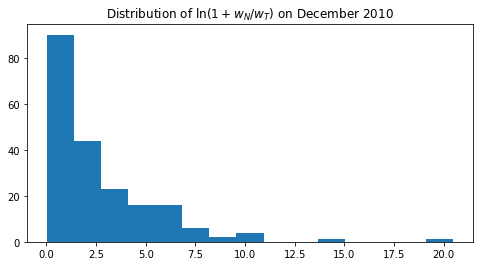

In [12]:
weight_m = pd.merge(topix_df, nikkei_df, on=['date', 'sedol'], suffixes=['_topix', '_nikkei'], how='right')
weight_m['ratio'] = weight_m['weight_nikkei']/weight_m['weight_topix']

dec = weight_m[weight_m['date']==pd.to_datetime('2010-12-15')]
plt.figure(figsize=(8,4))
plt.hist(dec['ratio'], bins=15)
plt.title('Distribution of $\ln(1 + w_{N}/w_{T}$) on December 2010')
plt.savefig(PATH + 'images/nikkei_topix')
plt.show()

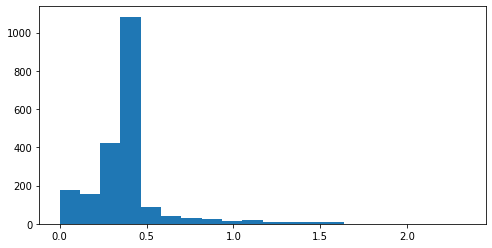

In [13]:
plt.figure(figsize=(8,4))
plt.hist(np.log(1 + rankings_full['boj_share_of_total']/rankings_full['topix_weight']), bins=20)
plt.title('')
plt.savefig(PATH + 'images/boj_share_vs_topix')
plt.show()

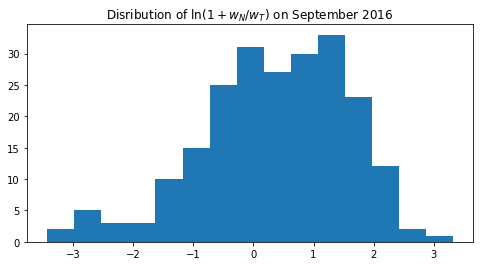

In [181]:
sept_2016 = weight_m[weight_m['date']==pd.to_datetime('2016-09-15')]
plt.figure(figsize=(8,4))
plt.hist(np.log(sept_2016['ratio']), bins=15)
plt.title('Disribution of $\ln(1 + w_{N}/w_{T}$) on September 2016')
plt.savefig(PATH + 'images/log_nikkei_topix')
plt.show()